Mean Squared Error: 9130787.329691207
R^2 Score: 0.6289309425561216


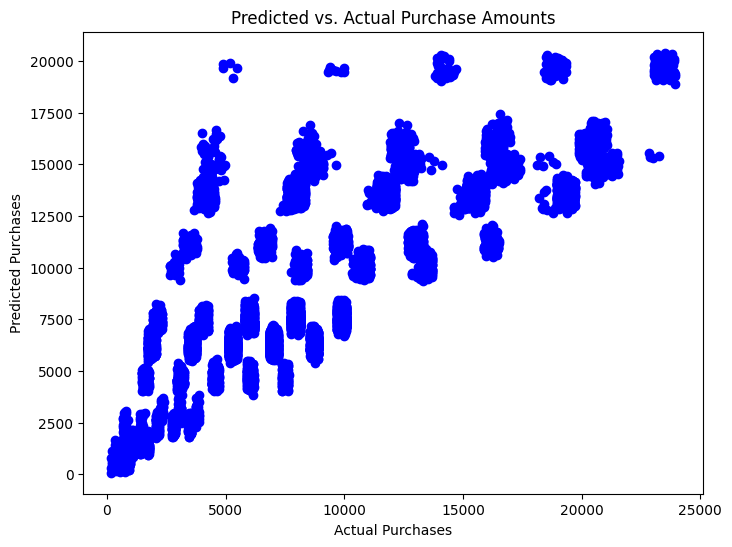

In [5]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("BlackFridaySales.csv")

# Drop unnecessary columns (User_ID and Product_ID)
data = data.drop(columns=['User_ID', 'Product_ID'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['Product_Category_2'] = imputer.fit_transform(data[['Product_Category_2']])
data['Product_Category_3'] = imputer.fit_transform(data[['Product_Category_3']])

# Drop any remaining rows with missing values
data = data.dropna()

# Select features and target variable
X = data.drop(columns=['Purchase'])
y = data['Purchase']

# Define columns to one-hot encode
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']

# Define transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Apply transformation
X_encoded = ct.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.title('Predicted vs. Actual Purchase Amounts')
plt.xlabel('Actual Purchases')
plt.ylabel('Predicted Purchases')
plt.show()